# Movie dataset visualization
### This task for visuzlize the data and get insights for more information

In [165]:
# Loading the important liberaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date as dt
import warnings 
warnings.filterwarnings('ignore')

In [166]:
# loading the dataset
df = pd.read_csv(r"mymoviedb.csv",lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [167]:
df.columns # to show the name of columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

# Content
## Features of the dataset:

- Release_Date:  
  Date when the movie was released.

- Title:  
  Name of the movie.

- Overview:  
  Brief summary of the movie.

- Popularity:  
  It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.

- Vote_Count:  
  Total votes received from the viewers.

- Vote_Average:  
  Average rating based on vote count and the number of viewers out of 10.

- Original_Language:  
  Original language of the movies. Dubbed version is not considered to be original language.

- Genre:  
  Categories the movie it can be classified as.

- Poster_Url:  
  Url of the movie poster.
vie poster.

In [169]:
df.info() # to show the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [170]:
df.isna().sum() / len(df) *100 # to know the percentage of non values 

Release_Date         0.0
Title                0.0
Overview             0.0
Popularity           0.0
Vote_Count           0.0
Vote_Average         0.0
Original_Language    0.0
Genre                0.0
Poster_Url           0.0
dtype: float64

In [171]:
df.duplicated().sum() / len(df) *100 # to know the percentage of duplicated values

0.0

In [172]:
# 'Poster_Url' column isn't useful so we will drop it
df = df.drop(columns = 'Poster_Url' ,axis=0)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [173]:
df['Original_Language'].value_counts() / len(df['Original_Language']) *100 # to show the percentage of language

Original_Language
en    77.032665
ja     6.563549
es     3.449679
fr     2.971405
ko     1.729928
zh     1.312710
it     1.251654
cn     1.109189
ru     0.844612
de     0.834436
pt     0.376514
da     0.284929
no     0.264577
hi     0.264577
sv     0.234049
nl     0.213697
pl     0.172993
th     0.172993
id     0.152641
tr     0.152641
tl     0.081408
te     0.061056
el     0.050880
fi     0.050880
sr     0.050880
cs     0.040704
fa     0.030528
hu     0.030528
is     0.020352
ro     0.020352
uk     0.020352
ta     0.020352
ar     0.020352
he     0.020352
ca     0.010176
la     0.010176
nb     0.010176
bn     0.010176
ms     0.010176
lv     0.010176
eu     0.010176
ml     0.010176
et     0.010176
Name: count, dtype: float64

In [174]:
# So we will make category of 'Original_Language' to ['en','ja','other']
df['Original_Language'] = df['Original_Language'].apply(lambda x: x if x in ['en', 'ja'] else 'other')
df['Original_Language'].value_counts() / len(df['Original_Language']) *100

Original_Language
en       77.032665
other    16.403785
ja        6.563549
Name: count, dtype: float64

### After knowing the info about data we will visualize the data 

### Frist we will show the best 10 movies 

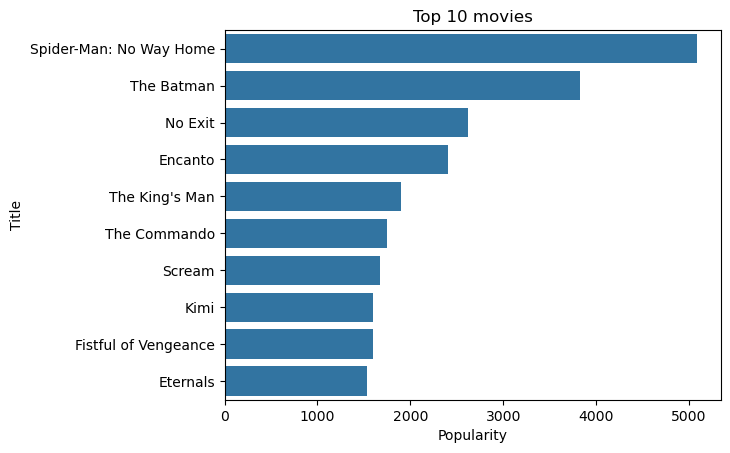

In [177]:
top_movies = df.sort_values(by='Popularity', ascending=False)
top_10_movies = top_movies.head(10)
sns.barplot(y=top_10_movies['Title'] ,x=top_10_movies['Popularity'])
plt.title('Top 10 movies')
plt.ylabel('Title')
plt.xlabel('Popularity')
plt.show()

### 2.We will show the Top 10 movies by 'Genre' and 'Populartiy'

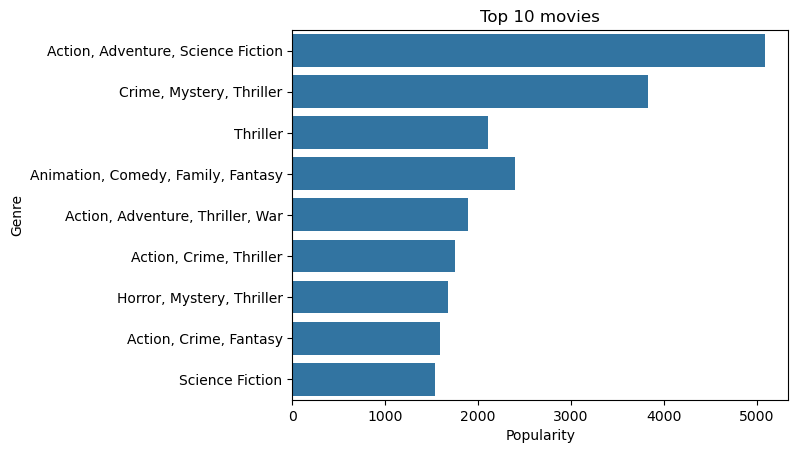

In [179]:
top_movies = df.sort_values(by='Popularity', ascending=False)
top_10_movies = top_movies.head(10)
sns.barplot(y=top_10_movies['Genre'] ,x=top_10_movies['Popularity'],ci=None)
plt.title('Top 10 movies')
plt.ylabel('Genre')
plt.xlabel('Popularity')
plt.show()

### 3.we will show the year has the max movies released

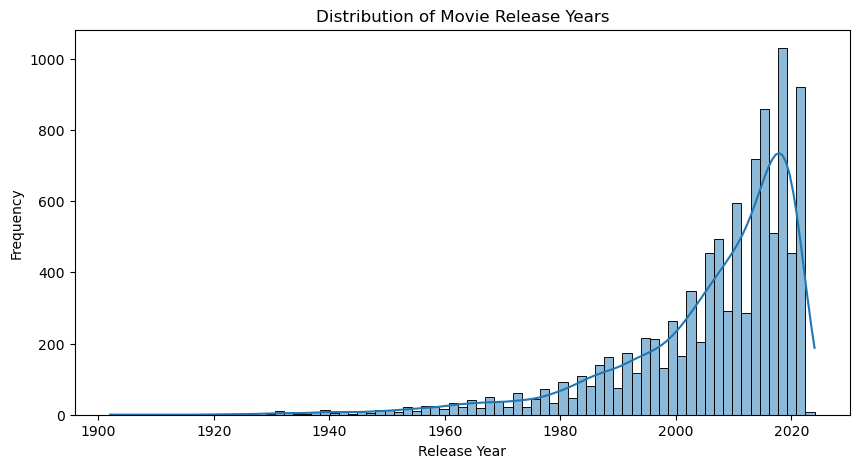

In [181]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
plt.figure(figsize=(10,5))
sns.histplot(df['Release_Date'].dt.year, kde=True)
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Release Years")
plt.show()

### 4. we will show the most year of movies has popularity 

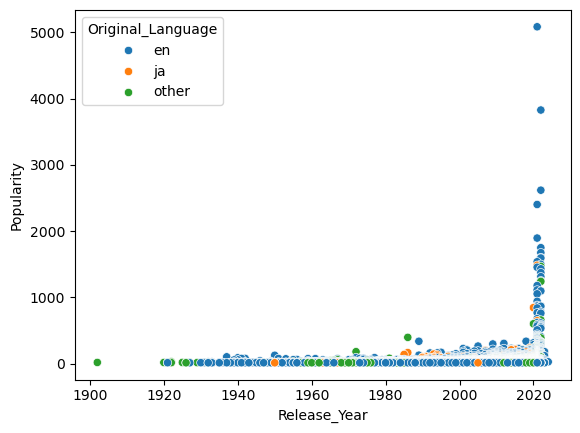

In [183]:
sns.scatterplot(x=df['Release_Date'].dt.year,y=df['Popularity'],hue=df['Original_Language'])
plt.xlabel('Release_Year')
plt.ylabel('Popularity')
plt.show()

### 5. the most month has the populartiy to know what is the part of the year has most popularity 

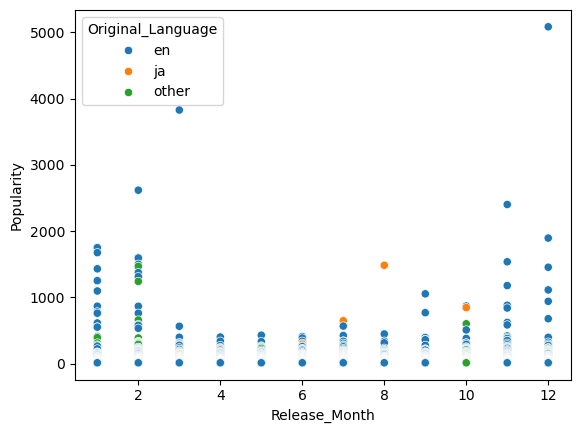

In [185]:
sns.scatterplot(x=df['Release_Date'].dt.month,y=df['Popularity'],hue=df['Original_Language'])
plt.xlabel('Release_Month')
plt.ylabel('Popularity')
plt.show()

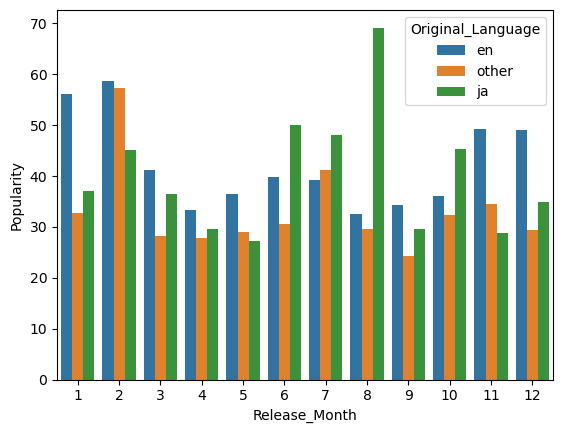

In [186]:
sns.barplot(x=df['Release_Date'].dt.month,y=df['Popularity'],hue=df['Original_Language'],ci=None)
plt.xlabel('Release_Month')
plt.ylabel('Popularity')
plt.show()

### 7. Show the top 10 movies has vote rate

In [188]:
top_rate_movies = df.sort_values(by='Vote_Average',ascending = False)
top_10_rate_movies = top_rate_movies.head(10)
top_10_rate_movies

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
9391,2020-04-09,Kung Fu Master Huo Yuanjia,The young and vigorous Huo Yuanjia was only fo...,13.745,1,10.0,other,"Action, Drama"
7339,2018-06-08,Franco Escamilla: Por La Anécdota,Mexican stand-up comedian Franco Escamilla dra...,16.158,92,9.2,other,Comedy
667,2019-03-29,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,Tanjiro finds his family slaughtered and the l...,86.689,27,9.1,ja,"Action, Animation, Fantasy"
2325,2021-06-17,Impossible Things,A widow who is tormented by the memory of her ...,36.466,82,9.1,other,"Family, Drama"
7401,2020-10-30,My Sex Doll,The story of chaos both body and mind occurs w...,16.088,4,9.0,other,"Comedy, Romance"
7014,2018-05-16,Sex School: Dorms of Desire,"Boning up for the finals, the girls of CSU won...",16.683,1,9.0,en,Comedy
6728,2021-11-18,Mission «Sky»,In the center of the story are three main char...,17.133,34,9.0,other,"Drama, War"
2391,2020-10-14,The Three Deaths of Marisela Escobedo,Follows a mother's tireless crusade to jail he...,35.767,183,9.0,other,"Documentary, Crime"
7039,2019-08-07,Bring the Soul: The Movie,"Following their landmark “Love Yourself” tour,...",16.652,323,8.9,other,"Music, Documentary"
5069,2021-08-19,"Ni tuyo, Ni mía",Amanda realizes that her perfect husband is ha...,20.696,49,8.9,other,Drama


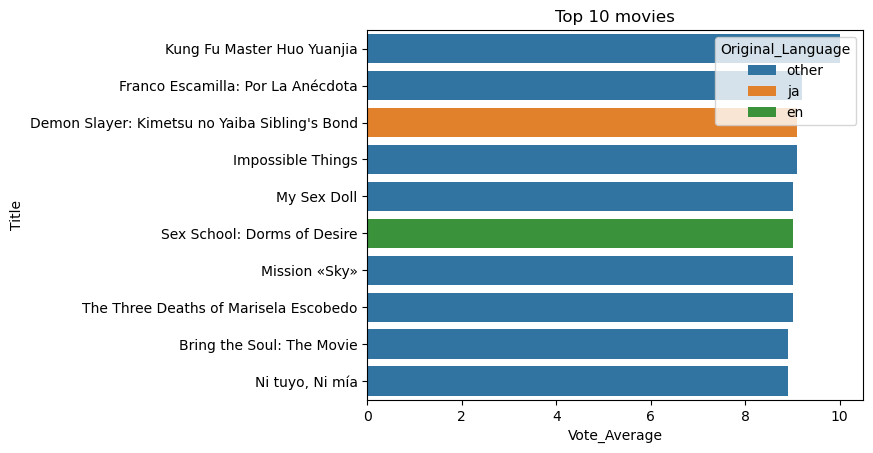

In [189]:
sns.barplot(y=top_10_rate_movies['Title'] ,x=top_10_rate_movies['Vote_Average'],hue =top_10_rate_movies['Original_Language'] ,ci=None)
plt.title('Top 10 movies')
plt.ylabel('Title')
plt.xlabel('Vote_Average')
plt.xticks()
plt.show()

### 7. Show the most genre of movies released

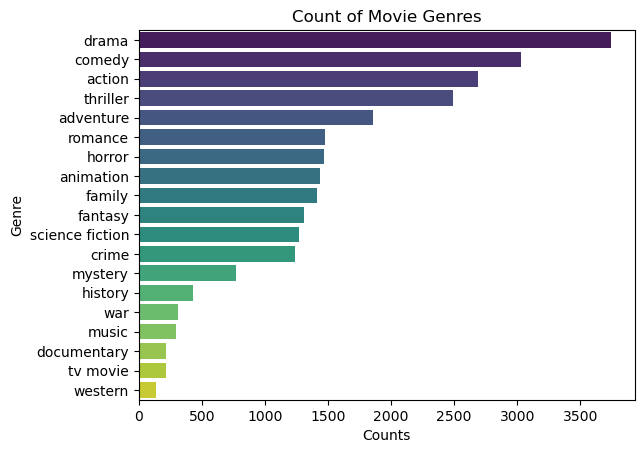

In [214]:
df['Genre'] = df['Genre'].str.lower().str.strip()
df_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
df_exploded = df_exploded.dropna(subset=['Genre'])
word_counts = df_exploded['Genre'].value_counts()
sns.barplot(x=word_counts.values, y=word_counts.index, palette="viridis")
plt.xlabel('Counts')
plt.ylabel('Genre')
plt.title('Count of Movie Genres')
plt.show()

### 8. Show the Genre in another way

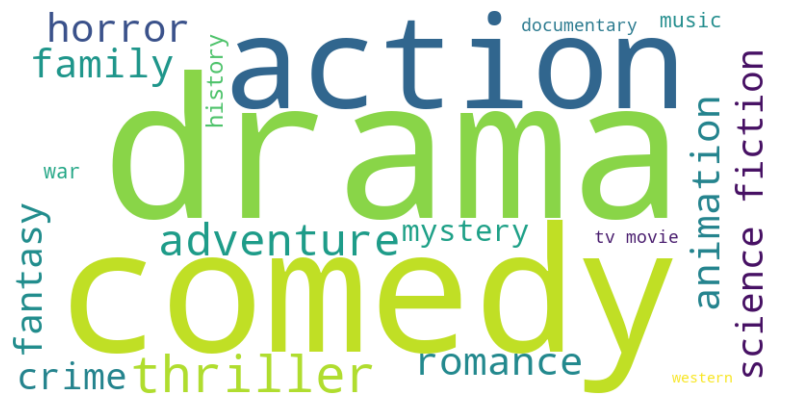

In [224]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()